In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('./data/stock_data.csv')

df.columns = ['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'OpenInt', 'Stock']

df.head

<bound method NDFrame.head of              Date       Open       High        Low      Close    Volume  \
0      1984-09-07    0.42388    0.42902    0.41874    0.42388  23220030   
1      1984-09-10    0.42388    0.42516    0.41366    0.42134  18022532   
2      1984-09-11    0.42516    0.43668    0.42516    0.42902  42498199   
3      1984-09-12    0.42902    0.43157    0.41618    0.41618  37125801   
4      1984-09-13    0.43927    0.44052    0.43927    0.43927  57822062   
...           ...        ...        ...        ...        ...       ...   
19581  2017-11-06  178.56000  180.45000  178.31000  180.17000  13275578   
19582  2017-11-07  180.50000  180.74800  179.40300  180.25000  12903836   
19583  2017-11-08  179.79000  180.35000  179.11000  179.56000  10467606   
19584  2017-11-09  178.31000  179.40000  177.09000  179.30000  12602188   
19585  2017-11-10  178.35000  179.10000  177.96000  178.46000  11060355   

       OpenInt Stock  
0            0  AAPL  
1            0  AAPL  


In [3]:

vals, counts = np.unique(df['Stock'], return_counts=True)

    

In [4]:
train_index = []

for i in counts:
    train = i // 2
    train_index.append(train)

train_index

[4182, 690, 3991, 929]

In [5]:
train_data = []
test_data = []
labels = []

for i in range(len(vals)):
    cmpy_data = df.loc[df['Stock'] == vals[i]]
    train_data = cmpy_data[0:train_index[i]]
    test_data = cmpy_data[train_index[i]:counts[i] - 2]
    class_val = cmpy_data[counts[i] - 1:]
    train_data.append(train_data)
    test_data.append(test_data)
    outputs = [[class_val] * (counts[i] - 1)]
    labels.append(outputs)

train_data = np.array(train_data)
test_data = np.array(test_data)
labels = np.array(labels)

print(train_data.shape)
print(test_data.shape)
print(labels.shape)

(929, 8)
(927, 8)
(4, 1)


In [6]:
values = labels.reshape((4,))
values.shape

(4,)

In [7]:
train_labels = []
test_labels = []
for i in range(values.shape[0]):
    l_train = values[i][0:train_index[i]]
    l_test = values[i][train_index[i]:]
    
    train_labels.append(l_train)
    
    test_labels.append(l_test)
train_labels = np.array(train_labels)
test_labels = np.array(test_labels)

print(train_labels.shape)
print(test_labels.shape)

(4,)
(4,)


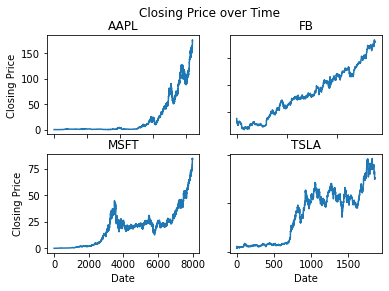

In [8]:

fig, ax = plt.subplots(2, 2)
fig.suptitle('Closing Price over Time')
j = 0
for i in range(4):
    apl = df.loc[df.Stock == vals[i]]

    dates = apl.Date
    closing = apl.Close

    dates = np.array(list(range(len(dates))))
    closing = np.array(closing)


    ax[j, i % 2].plot(dates, closing)
    ax[j, i % 2].set_title(vals[i])
    
    if i == 1:
        j = j + 1
        
for a in ax.flat:
    a.set(xlabel='Date', ylabel='Closing Price')
    
for a in ax.flat:
    a.label_outer()
    
plt.show()

In [9]:
from matplotlib.pylab import rcParams
rcParams['figure.figsize']=20, 10
from keras.models import Sequential
from keras.layers import LSTM, Dropout, Dense

from sklearn.preprocessing import MinMaxScaler

In [21]:
df = pd.read_csv('./data/NSE-Tata.csv')
df.head

<bound method NDFrame.head of             Date    Open    High     Low    Last   Close  \
0     2018-10-08  208.00  222.25  206.85  216.00  215.15   
1     2018-10-05  217.00  218.60  205.90  210.25  209.20   
2     2018-10-04  223.50  227.80  216.15  217.25  218.20   
3     2018-10-03  230.00  237.50  225.75  226.45  227.60   
4     2018-10-01  234.55  234.60  221.05  230.30  230.90   
...          ...     ...     ...     ...     ...     ...   
1230  2013-10-14  160.85  161.45  157.70  159.30  159.45   
1231  2013-10-11  161.15  163.45  159.00  159.80  160.05   
1232  2013-10-10  156.00  160.80  155.85  160.30  160.15   
1233  2013-10-09  155.70  158.20  154.15  155.30  155.55   
1234  2013-10-08  157.00  157.80  155.20  155.80  155.80   

      Total Trade Quantity  Turnover (Lacs)  
0                4642146.0         10062.83  
1                3519515.0          7407.06  
2                1728786.0          3815.79  
3                1708590.0          3960.27  
4                15

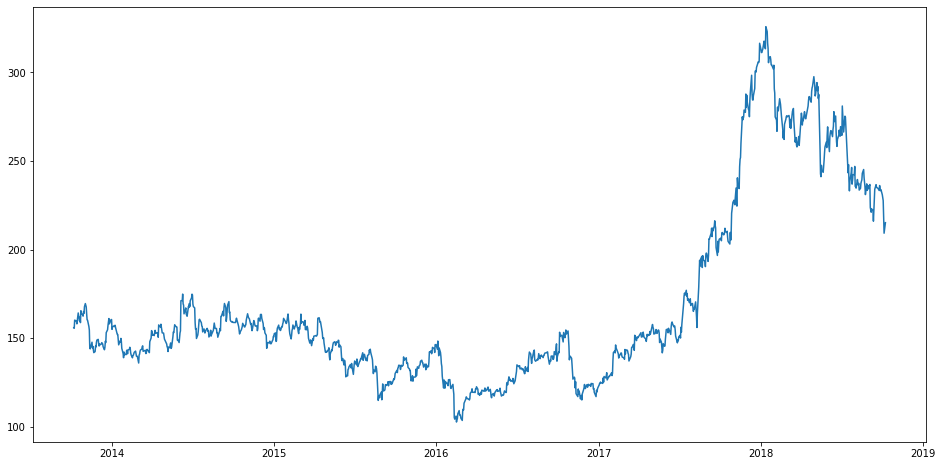

In [11]:
df["Date"]=pd.to_datetime(df.Date,format="%Y-%m-%d")
df.index=df['Date']

plt.figure(figsize=(16,8))
plt.plot(df["Close"],label='Close Price history')

In [22]:
data = df.sort_index(ascending=True, axis=0)
new_dataset = pd.DataFrame(index=range(0, len(df)), columns=['Date', 'Close'])

for i in range(0, len(df)):
    new_dataset['Date'][i] = data['Date'][i]
    new_dataset['Close'][i] = data['Close'][i]

In [24]:
# scaler = MinMaxScaler(feature_range=(0, 1))
# final_dataset = new_dataset.values
# # print(final_dataset[2])
# train_data = final_dataset[0:987, :]
# valid_data = final_dataset[987:, :]

# new_dataset.index = new_dataset.Date
# new_dataset.drop("Date", axis=1, inplace=True)
# scaler = MinMaxScaler(feature_range=(0, 1))
# scaled_data = scaler.fit_transform(final_dataset)

# x_train_data, y_train_data = [], []

# for i in range(60, len(train_data)):
#     x_train_data.append(scaled_data[i - 60:i, 0])
#     y_train_data.append(scaled_data[i, 0])

# x_train_data, y_train_data = np.array(x_train_data), np.array(y_train_data)

# x_train_data = np.reshape(x_train_data, (x_train_data.shape[0], x_train_data.shape[1], 1))
